## Logistic Regression

 Logistic Regression (also called Logit Regression) is com‐ monly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

### Flower Classification

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [10]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# loading the data
iris = load_iris()
print(list(iris))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [11]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int32) # 1 if Iris-Virginica, else 0

In [13]:
# Train a Logistic Regression model

log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42, solver='liblinear')

/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/matplotlib/patches.py:1390: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


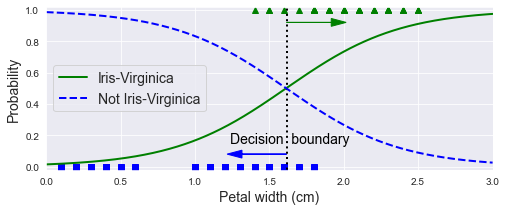

In [16]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
#save_fig("logistic_regression_plot")
plt.show()

In [17]:
print(decision_boundary)

[1.61561562]


In [18]:
log_reg.predict([[1.7], [1.5]])

array([1, 0], dtype=int32)

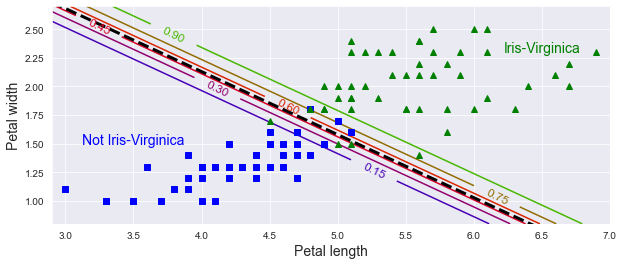

In [19]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int32)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression<br><br>
The idea is quite simple: when given an instance x, the Softmax Regression model first computes a score sk(x) for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores. The equation to compute sk(x) should look familiar, as it is just like the equation for Linear Regression prediction<br><br>
The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture.

In [20]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

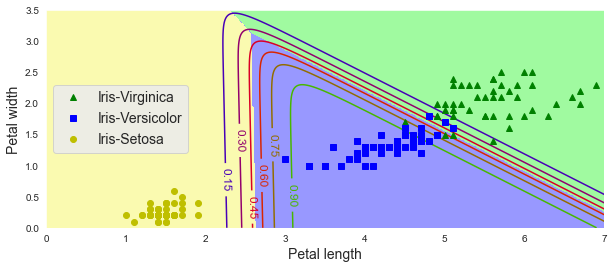

In [21]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
#save_fig("softmax_regression_contour_plot")
plt.show()

In [22]:
softmax_reg.predict([[5, 2]])

array([2])

In [23]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

Softmax regression is a type of logistic regression that is used for multi-class classification problems, where the goal is to predict the probability of each class label for a given input.<br>

In softmax regression, we start with a linear regression model that outputs a score for each class label, based on the input features. Then, we apply the softmax function to the scores to obtain a probability distribution over the class labels. The softmax function takes the scores as input and outputs a vector of probabilities, where each element represents the probability of the corresponding class label.<br>

The softmax function works by exponentiating each score and normalizing the resulting values to sum up to one. This ensures that the output probabilities are non-negative and add up to one, making them interpretable as class probabilities.<br>

During training, the model is optimized to minimize the cross-entropy loss function, which measures the difference between the predicted class probabilities and the true class labels. This involves adjusting the weights of the linear regression model using a technique called gradient descent, where we iteratively update the weights in the direction of the steepest descent of the loss function.<br>

Once the model is trained, we can use it to predict the class label for a new input by applying the same linear transformation and softmax function to the input, and selecting the class label with the highest probability.